# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

(-90, 90)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
weather_df = pd.DataFrame(cities).rename(columns={0: "City"})
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Temperature"] = ""
weather_df["Humidity"] = ""
weather_df["Cloudiness"] = ""
weather_df["Wind Speed"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,xai-xai,,,,,,,,
1,severo-kurilsk,,,,,,,,
2,punta arenas,,,,,,,,
3,vaini,,,,,,,,
4,new norfolk,,,,,,,,
...,...,...,...,...,...,...,...,...,...
608,humaita,,,,,,,,
609,aklavik,,,,,,,,
610,kokoda,,,,,,,,
611,terrace,,,,,,,,


In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q=bluff&units=imperial"
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=333293015ec9475ac55144ec90164a04&q=bluff&units=imperial'

In [17]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -46.6, 'lon': 168.33},
 'dt': 1604114503,
 'id': 2206939,
 'main': {'feels_like': 45.73,
          'humidity': 89,
          'pressure': 1007,
          'temp': 53.01,
          'temp_max': 53.01,
          'temp_min': 53.01},
 'name': 'Bluff',
 'sys': {'country': 'NZ',
         'id': 2008959,
         'sunrise': 1604078605,
         'sunset': 1604129822,
         'type': 3},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 223, 'gust': 21.99, 'speed': 13}}


In [47]:
# weather_json['coord']['lat'] for lat
# weather_json['coord']['lon'] for lon
# weather_json['main']['temp'] for temp
# weather_json['main']['humidity'] for humidity
# weather_json['clouds']['all'] for cloudiness
# weather_json['wind']['speed'] for windspeed
# weather_json['sys']['country'] for country
# weather_json['dt'] for date

1604114503

In [48]:
params = {
    "appid": weather_api_key,
    "units": "imperial"
}
weatherUrl = "http://api.openweathermap.org/data/2.5/weather?"
for index,row in weather_df.iterrows():
    city = row["City"]
    params["q"] = city
    print(f"Processing Record {index} | {city}")
    loopResponse = requests.get(weatherUrl, params=params).json()
    
    try:
        weather_df.loc[index, "Latitude"] = loopResponse['coord']['lat']
        weather_df.loc[index, "Longitude"] = loopResponse['coord']['lon']
        weather_df.loc[index, "Temperature"] = loopResponse['main']['temp']
        weather_df.loc[index, "Humidity"] = loopResponse['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = loopResponse['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = loopResponse['wind']['speed']
        weather_df.loc[index, "Country"] = loopResponse['sys']['country']
        weather_df.loc[index, "Date"] = loopResponse['dt']
        
    except KeyError:
        print("City not found. Skipping...")
        
    
        

Processing Record 0 | xai-xai
Processing Record 1 | severo-kurilsk
Processing Record 2 | punta arenas
Processing Record 3 | vaini
Processing Record 4 | new norfolk
Processing Record 5 | tsihombe
City not found. Skipping...
Processing Record 6 | bluff
Processing Record 7 | gillette
Processing Record 8 | meulaboh
Processing Record 9 | half moon bay
Processing Record 10 | port alfred
Processing Record 11 | saldanha
Processing Record 12 | taoudenni
Processing Record 13 | grand river south east
City not found. Skipping...
Processing Record 14 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 | lompoc
Processing Record 16 | jamestown
Processing Record 17 | nova olinda do norte
Processing Record 18 | avarua
Processing Record 19 | busselton
Processing Record 20 | cidreira
Processing Record 21 | tasiilaq
Processing Record 22 | thompson
Processing Record 23 | rikitea
Processing Record 24 | kapaa
Processing Record 25 | rawson
Processing Record 26 | ambilobe
Processing Record 27 

Processing Record 231 | saint george
Processing Record 232 | cabra
Processing Record 233 | angra dos reis
Processing Record 234 | fairbanks
Processing Record 235 | barra do corda
Processing Record 236 | sabang
Processing Record 237 | attawapiskat
City not found. Skipping...
Processing Record 238 | san patricio
Processing Record 239 | daru
Processing Record 240 | nizhneyansk
City not found. Skipping...
Processing Record 241 | hasaki
Processing Record 242 | ribeira grande
Processing Record 243 | staryy nadym
Processing Record 244 | klyuchi
Processing Record 245 | el alto
Processing Record 246 | tiznit
Processing Record 247 | bayeux
Processing Record 248 | mayari
City not found. Skipping...
Processing Record 249 | asyut
Processing Record 250 | isangel
Processing Record 251 | laguna
Processing Record 252 | chifeng
Processing Record 253 | evensk
Processing Record 254 | jiazi
Processing Record 255 | balykshi
Processing Record 256 | rapar
Processing Record 257 | mahebourg
Processing Record 25

City not found. Skipping...
Processing Record 458 | sorong
Processing Record 459 | homa bay
Processing Record 460 | moose factory
Processing Record 461 | uvelskiy
Processing Record 462 | chekmagush
Processing Record 463 | ixtapa
Processing Record 464 | padang
Processing Record 465 | kaitangata
Processing Record 466 | batasan
Processing Record 467 | aviles
Processing Record 468 | temaraia
City not found. Skipping...
Processing Record 469 | north bend
Processing Record 470 | vila
Processing Record 471 | axim
Processing Record 472 | osakarovka
Processing Record 473 | verkhnyaya inta
Processing Record 474 | paamiut
Processing Record 475 | neuquen
Processing Record 476 | tokur
Processing Record 477 | kupino
Processing Record 478 | lianyuan
Processing Record 479 | arkhangelos
City not found. Skipping...
Processing Record 480 | wulanhaote
City not found. Skipping...
Processing Record 481 | denpasar
Processing Record 482 | konya
Processing Record 483 | soe
Processing Record 484 | goderich
Proc

In [49]:
weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,xai-xai,-25.05,33.64,74.86,81,64,11.54,MZ,1604118852
1,severo-kurilsk,50.68,156.12,40.42,91,100,38.27,RU,1604118852
2,punta arenas,-53.15,-70.92,42.4,87,75,6.93,CL,1604118852
3,vaini,-21.2,-175.2,73.4,83,40,10.29,TO,1604118609
4,new norfolk,-42.78,147.06,68.32,33,28,5.01,AU,1604118853
...,...,...,...,...,...,...,...,...,...
608,humaita,-7.51,-63.02,74.55,97,94,3.15,BR,1604118989
609,aklavik,68.22,-135.01,1.4,91,99,3.36,CA,1604118632
610,kokoda,-8.88,147.74,84.11,57,84,4.92,PG,1604118990
611,terrace,54.52,-128.6,35.6,93,75,11.41,CA,1604118990


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [79]:
cleanCityData_df = weather_df.loc[weather_df["Humidity"] != "", :]
cleanCityData_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,xai-xai,-25.05,33.64,74.86,81,64,11.54,MZ,1604118852
1,severo-kurilsk,50.68,156.12,40.42,91,100,38.27,RU,1604118852
2,punta arenas,-53.15,-70.92,42.4,87,75,6.93,CL,1604118852
3,vaini,-21.2,-175.2,73.4,83,40,10.29,TO,1604118609
4,new norfolk,-42.78,147.06,68.32,33,28,5.01,AU,1604118853
...,...,...,...,...,...,...,...,...,...
608,humaita,-7.51,-63.02,74.55,97,94,3.15,BR,1604118989
609,aklavik,68.22,-135.01,1.4,91,99,3.36,CA,1604118632
610,kokoda,-8.88,147.74,84.11,57,84,4.92,PG,1604118990
611,terrace,54.52,-128.6,35.6,93,75,11.41,CA,1604118990


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

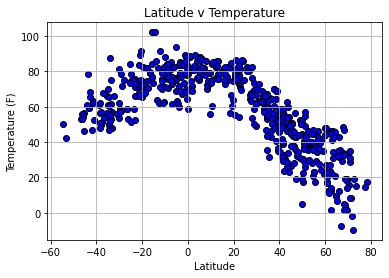

In [81]:
plt.scatter(cleanCityData_df["Latitude"], cleanCityData_df["Temperature"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

## Latitude vs. Humidity Plot

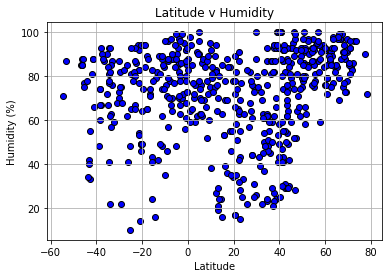

In [86]:
plt.scatter(cleanCityData_df["Latitude"], cleanCityData_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

## Latitude vs. Cloudiness Plot

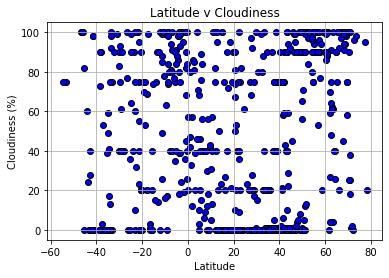

In [85]:
plt.scatter(cleanCityData_df["Latitude"], cleanCityData_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

## Latitude vs. Wind Speed Plot

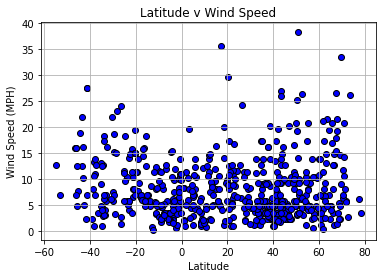

In [87]:
plt.scatter(cleanCityData_df["Latitude"], cleanCityData_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

## Linear Regression

In [88]:
northernHemi_df = cleanCityData_df.loc[cleanCityData_df["Latitude"] >= 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


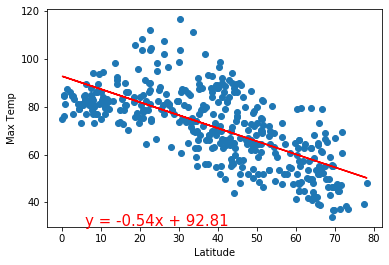

In [ ]:
plt.scatter(northernHemi_df["Latitude"], northernHemi_df["Temperature"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Temperature (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

slope, int, r, p, std_err = stats.linregress(northernHemi_df["Latitude"], northernHemi_df["Temperature"])
vc_fit = slope * northernHemi_df["Latitude"] + int

plt.plot(northernHemi_df["Latitude"],vc_fit,"--")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


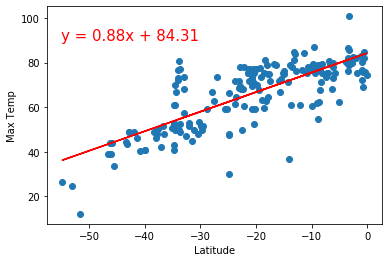

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


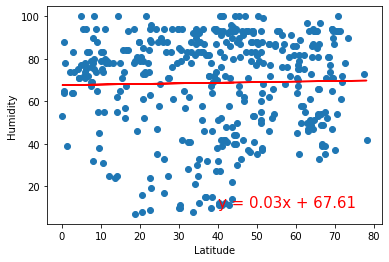

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


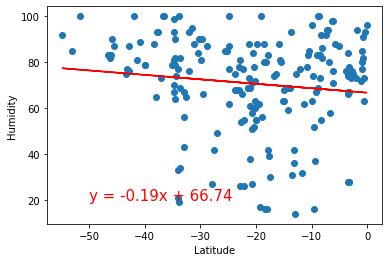

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


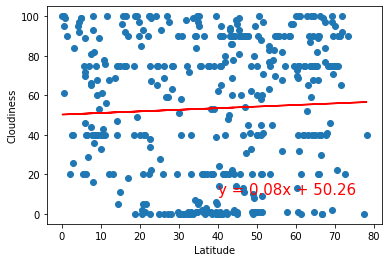

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


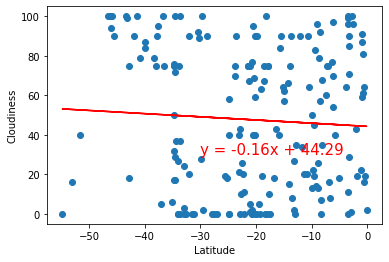

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


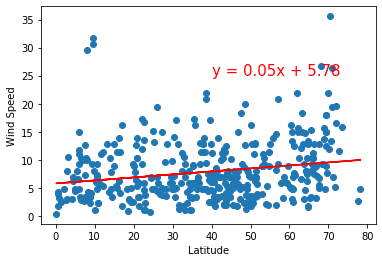

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


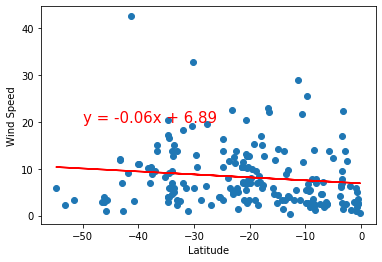